In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #cyclic learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import pickle

In [ ]:
df = pd.read_csv('Fertilizer Prediction.csv')
df

FileNotFoundError: ignored

hence we can note that N P K values are the target.
so we will predict that as per {temp, hum, moist, soil, crop} which N P K values are most optimal.

In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
cat_soiltype = df['Soil Type'].unique()
cat_soiltype

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
cat_croptype = df['Crop Type'].unique()
cat_croptype

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
replace_dict = {'Sandy' : 0, 'Loamy': 1, 'Black': 2, 'Red': 3, 'Clayey': 4}
df['Soil Type'] = df['Soil Type'].replace(replace_dict)
df


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,Maize,37,0,0,Urea
1,29,52,45,1,Sugarcane,12,0,36,DAP
2,34,65,62,2,Cotton,7,9,30,14-35-14
3,32,62,34,3,Tobacco,22,0,20,28-28
4,28,54,46,4,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,4,Pulses,24,0,19,28-28
95,30,60,27,3,Tobacco,4,17,17,10-26-26
96,38,72,51,1,Wheat,39,0,0,Urea
97,36,60,43,0,Millets,15,0,41,DAP


In [ ]:
replacedict = {'Maize' : 0, 'Sugarcane' : 1, 'Cotton' :2, 'Tobacco':3, 'Paddy':4, 'Barley':5,
       'Wheat':6, 'Millets':7, 'Oil seeds':8, 'Pulses':9, 'Ground Nuts':10}
df['Crop Type'] = df['Crop Type'].replace(replacedict)
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,0,37,0,0,Urea
1,29,52,45,1,1,12,0,36,DAP
2,34,65,62,2,2,7,9,30,14-35-14
3,32,62,34,3,3,22,0,20,28-28
4,28,54,46,4,4,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,4,9,24,0,19,28-28
95,30,60,27,3,3,4,17,17,10-26-26
96,38,72,51,1,6,39,0,0,Urea
97,36,60,43,0,7,15,0,41,DAP


so when we take input we can take the input accordingly since the testing data has been manipulated

<ipython-input-98-a8650de3ad2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-98-a8650de3ad2f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'Reds')


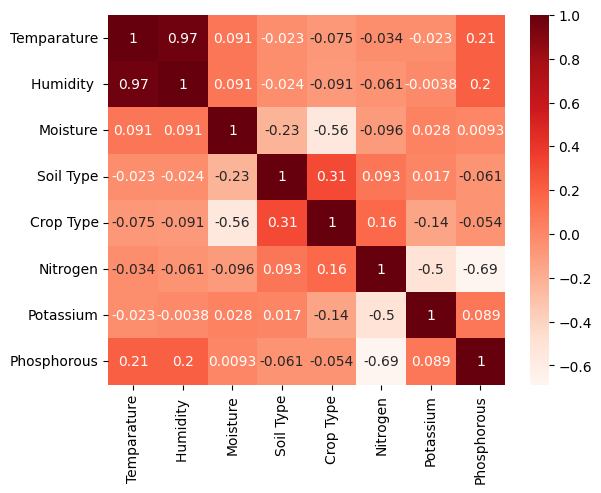

In [ ]:
# Creating a matrix using age, salry, balance as rows and columns
df.corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

In [ ]:
x = df.drop('Fertilizer Name', axis=1)  # Features (input variables)
y = df['Fertilizer Name']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('x_train shape type: ', type(x_train))
print('y_train shape type: ', type(y_train))
print('x_test shape type: ', type(x_test))
print('y_test shape type: ', type(y_test))

x_train shape type:  <class 'pandas.core.frame.DataFrame'>
y_train shape type:  <class 'pandas.core.series.Series'>
x_test shape type:  <class 'pandas.core.frame.DataFrame'>
y_test shape type:  <class 'pandas.core.series.Series'>


In [ ]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# K-nearest neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# Step 7: Predicting the data
logreg_predictions = logreg_model.predict(x_test)
knn_predictions = knn_model.predict(x_test)

# Step 8: Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print('Logistic Regression Accuracy:', logreg_accuracy*100)
print('KNN Accuracy:', knn_accuracy*100)

Logistic Regression Accuracy: 95.0
KNN Accuracy: 90.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

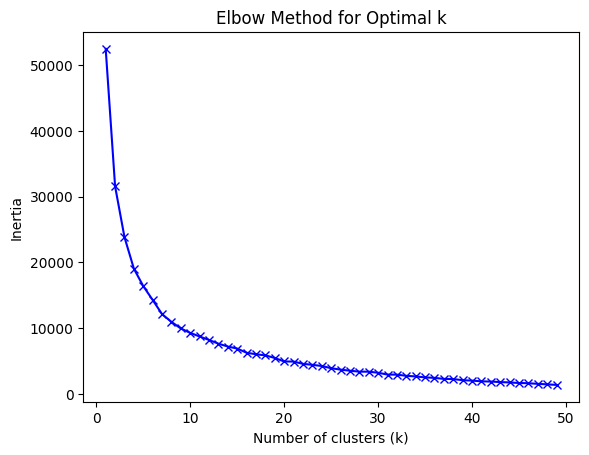

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your dataset stored in a variable called 'data'

# Initialize empty lists to store the values of k and corresponding inertias
k_values = []
inertias = []

# Define the range of k values to test
k_range = range(1, 50)

# Iterate over each value of k
for k in k_range:
    # Create a KMeans object with current k value
    kmeans = KMeans(n_clusters=k)

    # Fit the KMeans model to the data
    kmeans.fit(x)

    # Append the current k value and inertia to the lists
    k_values.append(k)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
k

49

In [ ]:
_

49

In [ ]:
pickle.dump(logreg_model, open('modellogreg_model.pkl', 'wb'))

In [ ]:
pickle.dump(knn_model, open('modelknn_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('modellogreg_model.pkl', 'rb'))
pickled_model.predict(x_test)

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '17-17-17', 'Urea'], dtype=object)

In [ ]:
pickled_model2 = pickle.load(open('modelknn_model.pkl', 'rb'))
pickled_model2.predict(x_test)

array(['20-20', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '17-17-17', 'Urea'], dtype=object)

In [ ]:
# 1. Prepare the input
# Assuming 'input_data' is your prepared input that falls outside the range or is an outlier
input_data = [26,	52,	38,	0, 1,37,	0,	0	]
input_data.reshape(-1, 1)
# 2. Load the trained model
# Assuming you have already trained and saved your model, and it's stored as 'model.pkl'
import pickle

# Load the trained model from the file
with open('modellogreg_model.pkl', 'rb') as f:
    model = pickle.load(f)

# 3. Make predictions
# Assuming your model has a `predict` method to make predictions
prediction = model.predict(input_data)

# 4. Interpret the output
# Assuming your model is a classification model and returns class labels
print("Prediction:", prediction)

# If your model is a regression model and returns numerical values, you can use:
# print("Prediction:", prediction)

# If your model is a multi-class classification and returns probabilities, you can use:
# predicted_probabilities = model.predict_proba(input_data)
# print("Predicted Probabilities:", predicted_probabilities)


AttributeError: ignored